In [1]:
import pandas as pd

time_series_data = pd.read_csv("output.csv")

In [2]:
time_series_data['updated'] = pd.to_datetime(time_series_data['updated'])

In [3]:
time_series_data.sort_values('updated')

In [14]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft

gym_data = time_series_data[time_series_data['location_name'] == 'Marino Center - 3rd Floor']
data = gym_data[['updated','last_count']]


In [15]:
len(gym_data['updated'])

6038

['Marino Center - 2nd Floor' 'Functional Training Area'
 'Marino Center - 3rd Floor Weight Room'
 'Marino Center - 3rd Floor Select & Cardio' 'SquashBusters - 4th Floor'
 'Marino Center - Gymnasium' 'Studio A' 'Studio B']


/var/folders/hx/pb7z003d0wv2wjbzhd36msn40000gn/T/ipykernel_49284/3553299324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('updated',inplace=True)


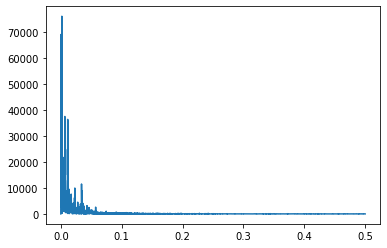

In [76]:
time_series_data = pd.read_csv("output.csv")
time_series_data['updated'] = pd.to_datetime(time_series_data['updated'])
print(time_series_data['location_name'].unique())
gym_data = time_series_data[time_series_data['location_name'] == 'Marino Center - 3rd Floor Weight Room']
# gym_data.plot(x="updated",y="last_count")
data = gym_data[['updated','last_count']]
data.sort_values('updated',inplace=True)
data.set_index('updated',inplace=True)
data_non_zero = data[data['last_count'] > 0]
f, Pxx = periodogram(data_non_zero.last_count)
plt.plot(f,Pxx)

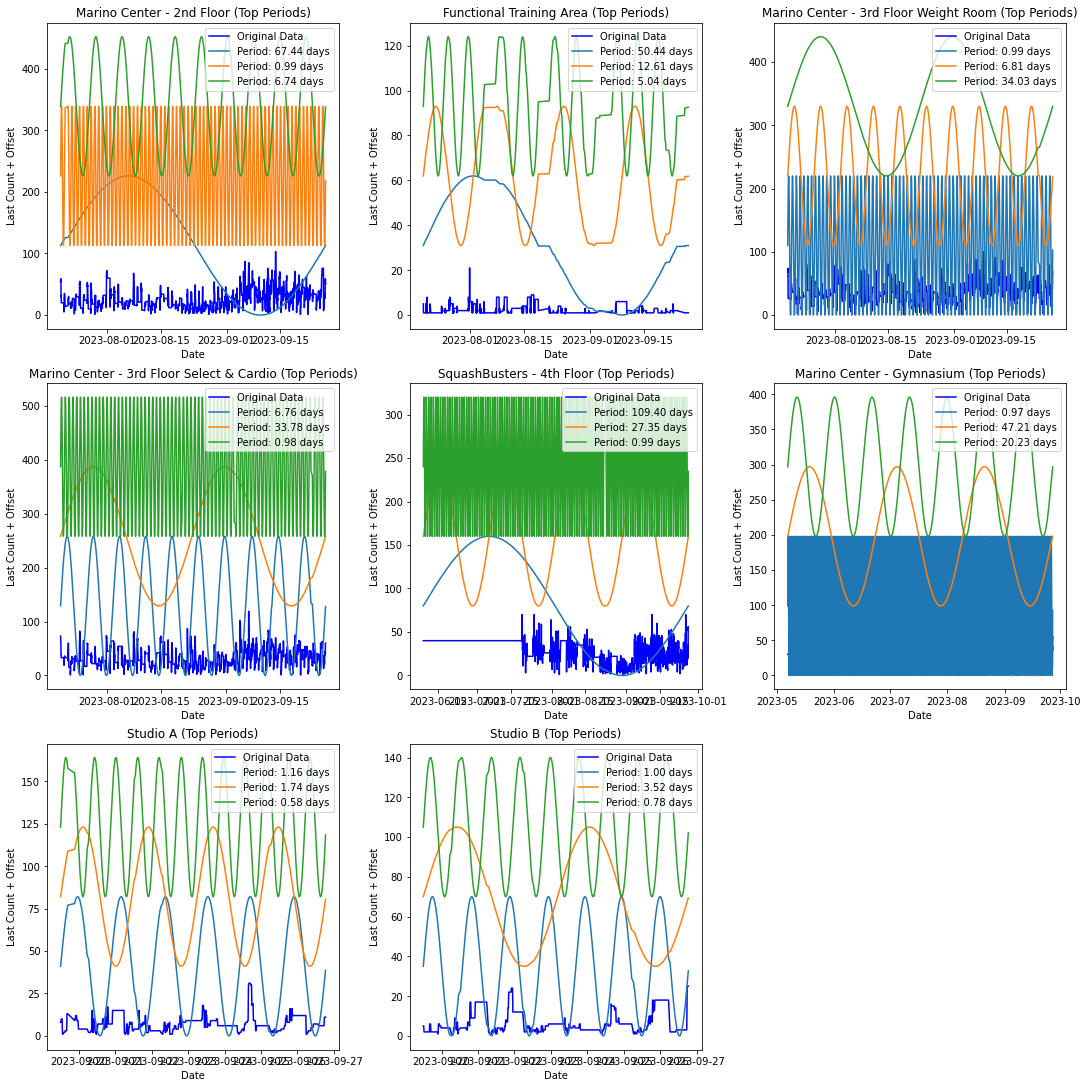

In [105]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, find_peaks

# Load the data from the newly uploaded file
time_series_data = pd.read_csv('output.csv')

# Convert the 'updated' column to datetime
time_series_data['updated'] = pd.to_datetime(time_series_data['updated'])

# Get the unique locations
unique_locations = time_series_data['location_name'].unique()

# Determine grid size for subplots based on number of locations
num_locations = len(unique_locations)
num_columns = 3  # Define the number of columns in the grid
num_rows = int(np.ceil(num_locations / num_columns))  # Calculate the required number of rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define a function to perform periodogram analysis and plot for a given location
def plot_location_periodogram(location, ax):
    # Filter data for the given location
    location_data = time_series_data[time_series_data['location_name'] == location]
    
    # Process data for non-zero last counts
    data = location_data[['updated', 'last_count']].copy()
    data.sort_values('updated', inplace=True)
    data.set_index('updated', inplace=True)
    data = data.groupby(data.index).mean()
    data = data.resample('15T').ffill()
    data_non_zero = data[data['last_count'] > 0]
    
    # Calculate the periodogram for non-zero last count data
    frequencies, Pxx = periodogram(data_non_zero['last_count'])
    
    # Find peaks in the periodogram data to determine the significant frequencies
    peaks_indices = find_peaks(Pxx)[0]
    peak_frequencies = frequencies[peaks_indices]
    peak_powers = Pxx[peaks_indices]
    
    # Sort the peaks by power and select the top 3
    sorted_indices = np.argsort(peak_powers)[::-1][:3]
    top_frequencies = peak_frequencies[sorted_indices]
    top_periods_samples = 1 / top_frequencies  # periods in number of samples
    
    # Since each sample represents 15 minutes, convert periods to days
    top_periods_days = top_periods_samples * (15 / (60 * 24))  # Convert from samples to days
    
    # Create sine waves for each of the top periods
    time_vector = np.arange(data_non_zero.shape[0]) * (15 / (60 * 24))  # Convert index to days
    offset = data_non_zero['last_count'].max() + 10
    
    # Plot original data
    ax.plot(data_non_zero.index, data_non_zero['last_count'], color='blue', label='Original Data')
    
    # Plot sine waves for the top periods
    for i, period in enumerate(top_periods_days):
        sine_wave = np.sin(2 * np.pi * time_vector / period) * offset + (i + 1) * offset
        ax.plot(data_non_zero.index, sine_wave, label=f'Period: {period:.2f} days')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Last Count + Offset')
    ax.set_title(f'{location} (Top Periods)')
    ax.legend()


# Loop through each location and apply the periodogram analysis and plotting
for i, location in enumerate(unique_locations):
    plot_location_periodogram(location, axes[i])

# Hide any unused subplots
for j in range(i + 1, num_rows * num_columns):
    axes[j].axis('off')

# Show the figure
plt.show()


In [87]:
sine_wave

array([1100.        , 1102.23544393, 1104.46977061, ..., 1093.29813662,
       1095.53022939, 1097.76455607])

<AxesSubplot:xlabel='updated'>

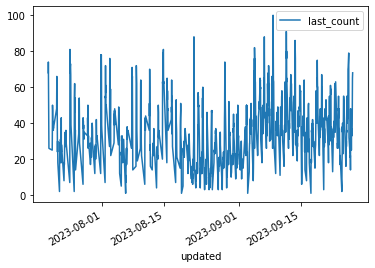

In [72]:
data_non_zero.plot()

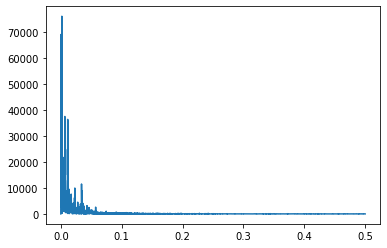

In [74]:
plt.plot(f,Pxx)

In [56]:
data_resampled = data

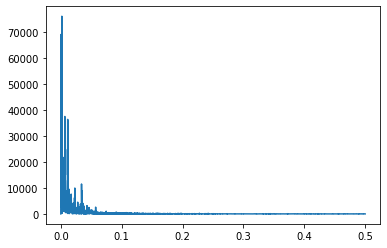

In [30]:
gym_data.dtypes

timestamp_scrape            object
percentage                 float64
location_name               object
last_count                   int64
updated             datetime64[ns]
open_boolean                  bool
dtype: object

In [31]:
data = gym_data[['updated','last_count']]
data

,updated,last_count
2,2023-07-19 19:06:00,68
7,2023-07-19 19:06:00,68
12,2023-07-19 19:06:00,68
17,2023-07-19 19:29:00,74
22,2023-07-19 19:29:00,74
...,...,...
34615,2023-09-26 18:40:00,68
34623,2023-09-26 18:40:00,68
34631,2023-09-26 19:01:00,68
34639,2023-09-26 19:01:00,68


In [34]:
data.set_index('updated',inplace=True)

In [35]:
data

,last_count
updated,
2023-07-19 19:06:00,68
2023-07-19 19:06:00,68
2023-07-19 19:06:00,68
2023-07-19 19:29:00,74
2023-07-19 19:29:00,74
...,...
2023-09-26 18:40:00,68
2023-09-26 18:40:00,68
2023-09-26 19:01:00,68


<AxesSubplot:xlabel='updated'>

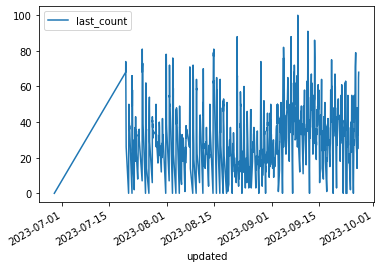

In [37]:
data.plot()

In [39]:
data.sort_values('updated',inplace=True)

/var/folders/hx/pb7z003d0wv2wjbzhd36msn40000gn/T/ipykernel_49284/2564204366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('updated',inplace=True)


In [40]:
data

,last_count
updated,
2023-06-28 15:57:00,0
2023-06-28 15:57:00,0
2023-06-28 15:57:00,0
2023-06-28 15:57:00,0
2023-06-28 15:57:00,0
...,...
2023-09-26 18:40:00,68
2023-09-26 18:40:00,68
2023-09-26 19:01:00,68


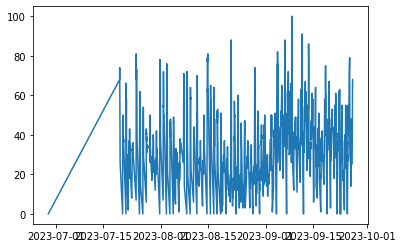

In [42]:
plt.plot(data.last_count)

In [44]:
f, Pxx = periodogram(data.last_count)

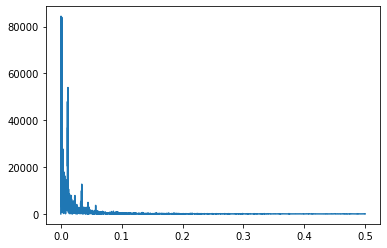

In [45]:
plt.plot(f, Pxx)


In [28]:
from scipy.signal import periodogram

In [29]:
f, Pxx = periodogram(gym_data[['updated','last_count']])

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:
f, Pxx = signal.periodogram(gym_data[')

<AxesSubplot:xlabel='updated'>

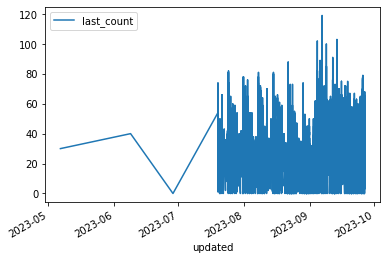

In [20]:
time_series_data.plot(x="updated",y="last_count")

In [5]:
fft_input = time_series_data['last_count'].values
fft_results = fft(fft_input)

NameError: name 'gym_data_sept_oct' is not defined